## Use gather to find core species across the pig gut metagenomes:
Species that are present in: 90, 95 or 99% of the metagenomes. At a variety of thresholds (0kb, 10kb, 50kb, 100kb, 1000kb)

In [ ]:
# ran gather x the 3216 metagenomes: Now subset output gather results using gather tables:
# for all species at t=0
mamba activate pangenomics_dev 

sourmash scripts gather_tables \
gather/*.csv \
-c "intersect_bp" -p \
-o 250813_gatherout.gtdb.species.pig.csv 

# 100 kb
sourmash scripts gather_tables \
gather/*.csv \
-c "intersect_bp" -p --filter 999999 \
-o 250902_gatherout.gtdb.species.100k.pig.csv 

In [ ]:
import pandas as pd
import sys

infile = sys.argv[1]
outprefix = sys.argv[2]

df = pd.read_csv(infile)
row_sum = df.drop(columns=['match_name']).sum(axis=1)
row_fraction = (row_sum / 3216).round(2)

thresholds = {'90': 0.9, '95': 0.95, '98': 0.98}

for suffix, threshold in thresholds.items():
    filtered_df = df[row_fraction >= threshold]
    outfile = f"{outprefix}_{suffix}.csv"
    filtered_df.to_csv(outfile, index=False)


In [ ]:
# concat outputs (count num core spp)
import pandas as pd
import glob
import os
import sys

outcsv = sys.argv[1]

rows = []
for f in glob.glob("gather.gtdbmags.*_*.csv"):
    df = pd.read_csv(f)
    num_entries = len(df)
    
    base = os.path.basename(f)
    bp_thresh = base.split("_")[0].split(".")[-1]
    perc_metag = base.split("_")[1].replace(".csv", "")
    
    rows.append({
        "bp_thresh": bp_thresh,
        "perc_metag": perc_metag,
        "num_entries": num_entries
    })

summary = pd.DataFrame(rows)
summary.to_csv(outcsv, index=False)


In [6]:
# open output and make plot
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/concatenated_gatherthresh.csv')
df['bp_thresh'] = df['bp_thresh'].str.replace('k', '', regex=False).astype(float)



,bp_thresh,perc_metag,num_entries
0,100k,98,6
1,50k,90,140
2,0k,95,54
3,50k,99,13
4,100k,90,21
5,100k,99,3
6,50k,98,22
7,0k,99,13
8,0k,90,148
9,50k,95,53


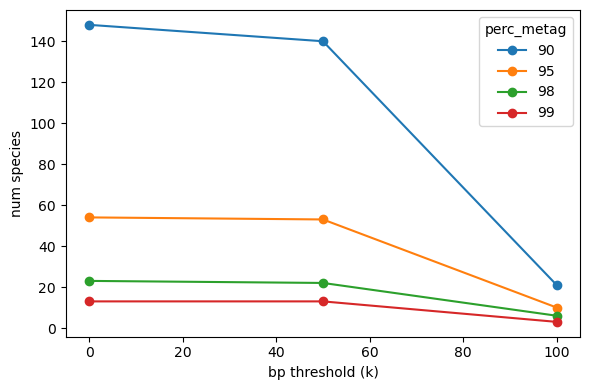

In [9]:

# sort for plotting
df = df.sort_values(by='bp_thresh')

plt.figure(figsize=(6,4))
for perc, sub in df.groupby('perc_metag'):
    plt.plot(sub['bp_thresh'], sub['num_entries'], marker='o', label=f"{perc}")

plt.xlabel("bp threshold (k)")
plt.ylabel("num species")
plt.legend(title="perc_metag")
plt.tight_layout()

